# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from citipy import citipy
from config import weather_api_key
# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#URL

units = "imperial"
url = f"http://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units={units}&q="


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

648

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [7]:
city_list = []
country_list = []
cloudiness_list = []
date_list = []
humidity_list = []
lat = []
lng = []
max_temp_list = []
wind_speed_list = []

count = 1

print("Beginning Data Retrieval ")
print("-----------------------------")

for city in cities:  
    
    try: 
        response = requests.get(f"{url}{city}").json() 
        city_list.append(response["name"])
        country_list.append(response["sys"]["country"])
        cloudiness_list.append(response["clouds"]["all"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        city_name = response["name"]
        
        print(f"Processing Record {count} : {city_name}")
        count= count + 1
               
    except:
        print("City not found. Skipping...")
    continue
    
print("-----------------------------")
print("Data Retrieval Complete")
print("-----------------------------")

Beginning Data Retrieval 
-----------------------------
Processing Record 1 : Pudozh
Processing Record 2 : Gualeguay
Processing Record 3 : Rikitea
Processing Record 4 : Qaanaaq
Processing Record 5 : Pitimbu
Processing Record 6 : Chokurdakh
Processing Record 7 : Sinnai
Processing Record 8 : Vaini
Processing Record 9 : Kavaratti
Processing Record 10 : Amahai
Processing Record 11 : Atuona
Processing Record 12 : Tasiilaq
City not found. Skipping...
Processing Record 13 : Hobart
Processing Record 14 : Lieksa
Processing Record 15 : Albany
Processing Record 16 : Meulaboh
Processing Record 17 : Kapaa
Processing Record 18 : Saint-Philippe
Processing Record 19 : Hermanus
Processing Record 20 : Bambous Virieux
Processing Record 21 : Longyearbyen
Processing Record 22 : São João da Barra
Processing Record 23 : Gornopravdinsk
City not found. Skipping...
Processing Record 24 : Naze
Processing Record 25 : Mataura
City not found. Skipping...
Processing Record 26 : Castro
Processing Record 27 : Morón
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
weather_dict = pd.DataFrame({ 
                "City" : city_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat,
                "Lng" : lng,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

In [10]:
# Count data
weather_dict.count()

City          595
Cloudiness    595
Country       595
Date          595
Humidity      595
Lat           595
Lng           595
Max Temp      595
Wind Speed    595
dtype: int64

In [14]:
# Display the Data Frame
weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Pudozh,99,RU,1651956450,88,61.8099,36.5345,49.15,11.21
1,Gualeguay,5,AR,1651956451,73,-33.1416,-59.3097,67.33,7.29
2,Rikitea,63,PF,1651956323,83,-23.1203,-134.9692,77.29,13.22
3,Qaanaaq,100,GL,1651956451,82,77.4840,-69.3632,19.04,1.79
4,Pitimbu,95,BR,1651956452,79,-7.4706,-34.8086,75.79,8.48


In [15]:
weather_dict.to_csv("../output_data/cities.csv", index = False, header=True)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

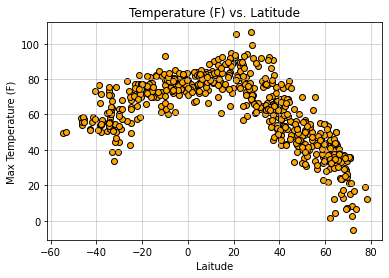

In [20]:
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "orange", edgecolor = "black")
plt.title("Temperature (F) vs. Latitude")
plt.xlabel("Laitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")


## Latitude vs. Humidity Plot

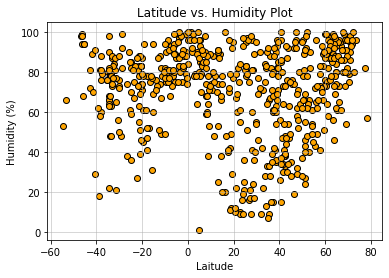

In [22]:
plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "orange", edgecolor = "black")
plt.title("Latitude vs. Humidity Plot")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Cloudiness Plot

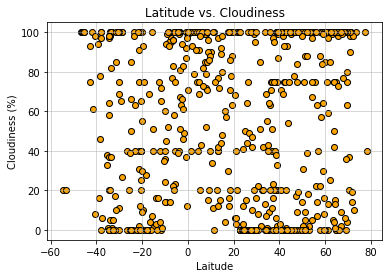

In [23]:
plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "orange", edgecolor = "black")
plt.title("Latitude vs. Cloudiness")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Latitude vs. Wind Speed Plot

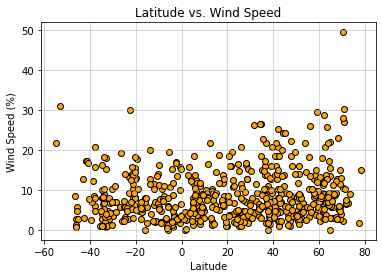

In [36]:
plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "orange", edgecolor = "black")
plt.title("Latitude vs. Wind Speed")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)


plt.savefig("../Images/City Latitude vs Max Temperature.png")

## Linear Regression

In [37]:
northern_hemisphere = weather_dict.loc[weather_dict["Lat"] >= 0]
southern_hemisphere = weather_dict.loc[weather_dict["Lat"] < 0]

In [40]:
x = northern_hemisphere['Lat']
y = southern_hemisphere['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

n_temp_plt = plt.scatter(x,y,marker='o')
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq, xy=(0,10),fontsize=12,color='orange')
plt.grid()
plt.title('Northern Hemisphere - Temperature (F) vs. Latitude')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('results/Figure_5.png')
plt.show()

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 401 and the array at index 1 has size 194

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression